# Spectral Analysis of Deterministic Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Summary

* The discrete Fourier transform (DFT) of a complex exponential signal with arbitrary frequency does not only consist of a contribution at this frequency. Except for the case that the frequency is a DFT eigenfrequency, additional contributions are inevitably present throughout the entire spectrum. The maximum of the magnitude spectrum (main lobe) is located approximately at the frequency of the exponential signal. The level of the additional contributions (side lobes) decay typically with increasing distance in frequency from the maximum. This effect is known as **leakage effect** or spectral leakage. The leakage effect is a consequence of considering only a finite number of samples in the DFT.

* Windowing refers to weighting the samples before performing the DFT. The amount of spectral leakage can be controlled by the window function. The rectangular window (equal weighting of all samples) results in the narrowest main lobe of all possible windows. Other window functions show wider main lobes at the benefit of lower or faster decaying side lobes. The choice of a particular window function is, amongst others, a trade-off between width of the main lobe and side lobe level.

* The leakage effect limits the spectral resolution of the DFT. The width of the main lobe of a particular window is linked to its capability to detect two exponential signals with comparable levels and similar frequencies, the decay of the side lobes to detect two exponential signals with disparate levels and dissimilar frequencies. The choice of a window function is a trade-off between high resolution and high dynamic range. It is in general application specific.

* Zero-padding a signal before computing its DFT is equivalent to a bandlimited interpolation in the frequency domain.

* For the short-time Fourier transform (STFT), a signal is split into short segments for which the DFT is subsequently computed. The magnitude of the STFT is known as spectrogram. In spectral analysis, the STFT provides insights into the temporal evolution of the spectral contents of a signal. It is of special interest for signals which change their spectral properties over time (non-stationary signals). The leakage effect applies to each subsequent DFT.

**Example**

The following example shows the impact of two different window functions on the magnitude spectrum of a complex exponential signal. The red line indicates the frequency $\Omega_0$ of the exponential signal. The leakage effect is clearly visible in both cases. However, the width of the main lobe and the decay of the side lobes is different for the different window functions.

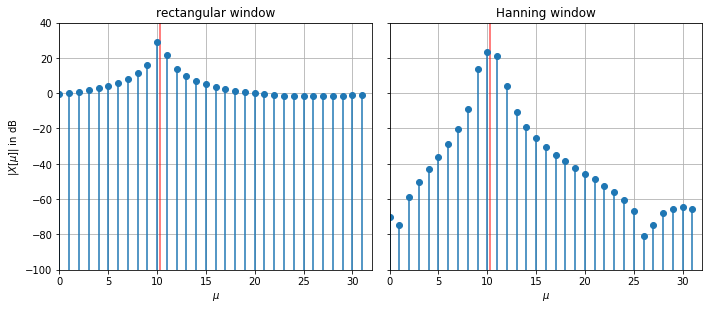

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 32  # length of the DFT
P = 10.3  # period of the exponential signal
w1 = np.ones(N)  # first window function
w2 = np.hanning(N)  # second window function


def plot_spectrum(X, title):
    plt.axvline(x=P, linewidth=2, color='r', alpha=.5)
    plt.stem(mu, 20*np.log10(np.abs(X)), basefmt = ' ', bottom=-300)
    plt.title(title)
    plt.xlabel(r'$\mu$')
    plt.axis([0, N, -100, 40])
    plt.grid()


# generate signal
k = np.arange(N)
Om0 = P*(2*np.pi/N)  # frequency of exponential signal
x = np.exp(1j*Om0*k)

# DFTs of the windowed signals
mu = np.arange(N)
X1 = np.fft.fft(x * w1)
X2 = np.fft.fft(x * w2)

# plot spectra
plt.figure(figsize = (10, 8))
ax1 = plt.subplot(2, 2, 1)
plot_spectrum(X1, 'rectangular window')
plt.ylabel(r'$|X[\mu]|$ in dB')
ax2 = plt.subplot(2, 2, 2, sharey=ax1)
plot_spectrum(X2, 'Hanning window')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.tight_layout()

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2018*.